# Overview
### English

#### In (Step 3) I have created a model to predict boarding prices using ML (Machine Learning) & the data I obtained in scraping (Step 1). After evaluation, it turned out that my model was far from expected. The model could not predict the data well and had a very high error value.
#### So this time I decided to improve the model with the information I got in EDA (Step 4) previously.

# Ringkasan

### Bahasa Indonesia

#### pada (Step 3) saya sudah membuat model untuk memprediksi harga kos dengan ML (Machine Learning) & data yang saya peroleh dalam scraping (Step 1). Setelah di evaluasi ternyata model saya jauh dari yang diharapkan, Model itu tidak dapat memprediksi data dengan baik dan memiliki nilai error yang sangat tinggi.
#### Jadi kali ini saya memutuskan untuk improve model tersebut dengan informasi informasi yang saya dapatkan di EDA (Step 4) Sebelumnya. 

In [1]:
# import common package
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/data_kos_malang_clean.csv')
data

,Nama Kos,Lokasi,Fasilitas,Ratings,Harga per Bulan
0,Kost Wisma Kencana Hidayah,Lowokwaru,"WiFi, Kasur, Akses 24 Jam",4.1,600000
1,Kost Omah Tipe 1,Lowokwaru,"K. Mandi Dalam, WiFi, Kloset Duduk, Kasur, Aks...",NaN,950000
2,Kost Graha Kamila Tipe Standar,Lowokwaru,"WiFi, Kloset Duduk, Kasur, Akses 24 Jam",NaN,1000000
3,Kost Semanggi,Lowokwaru,Kasur,NaN,500000
4,Kost CM6,Lowokwaru,"WiFi, Kasur, Akses 24 Jam",NaN,950000
...,...,...,...,...,...
235,Kost Syariah Kertosentono,Lowokwaru,"WiFi, Kasur, Akses 24 Jam",NaN,650000
236,Kost Candi Mendut Tipe A1,Lowokwaru,"K. Mandi Dalam, Kloset Duduk, Kasur, Akses 24 Jam",NaN,900000
237,Kost Borobudur Utara,Lowokwaru,"WiFi, Kloset Duduk, Kasur, Akses 24 Jam",NaN,500000
238,Kost CMG Tipe Vip,Lowokwaru,"K. Mandi Dalam, WiFi, Kloset Duduk, Kasur",NaN,900000


# Data Spliting

#### This time I tried to use the "Ratings" column also as a feature because there is information that can be useful (According to EDA in Step 3) and removed the "Location" column because it has no effect on predicting the model.

#### Kali ini saya mencoba untuk menggunakan kolom "Ratings" juga sebagai fitur karena ada informasi yang bisa berguna (Menurut EDA pada Step 3) dan menghapus kolom "Lokasi" karena tidak berpengaruh untuk memprediksi model.

In [3]:
from sklearn.model_selection import train_test_split

# drop colum Lokasi & Nama
data.drop(['Nama Kos','Lokasi'], axis=1, inplace=True)

# define Feature (X) & Label (y)
X = data.drop('Harga per Bulan', axis=1)
y = data['Harga per Bulan']

# spliting
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.25,
                                                   random_state=42)

# check 
X_train.shape, y_train.shape

((180, 2), (180,))

# Make Function

#### First I will create a function to get data on the number of boarding facilities

#### Pertama saya akan membuat fungsi untuk mendapatkan data berapa jumlah fasilitas kos

In [4]:
def get_count_facilities(DATA):
    
    # copy data
    D = DATA.copy(deep=True)
    
    # looping for get data
    for i in D.index:
        d = len(D.loc[i, 'Fasilitas'].split(', '))
        D.loc[i, 'Jumlah Fasilitas'] = d
        
    return D
        

In [5]:
# check fungtion
get_count_facilities(X_train.head())

,Fasilitas,Ratings,Jumlah Fasilitas
95,"WiFi, Kasur, Akses 24 Jam",NaN,3.0
126,"WiFi, Kasur, Akses 24 Jam",NaN,3.0
120,"WiFi, Kasur, Akses 24 Jam",NaN,3.0
67,"WiFi, Akses 24 Jam",NaN,2.0
101,"Kasur, Akses 24 Jam",NaN,2.0


#### Secondly, I will separate each facility column and assign a value [0, 1] to each column.

#### Yang kedua saya akan memisah setiap kolom fasilitas dan memberikan nilai [0, 1] pada setiap kolomnya.

In [6]:
def get_facilities(DATA):
    
    # unique values
    unique_facility = ['WiFi', 'Kasur', 'Akses 24 Jam', 'K. Mandi Dalam', 'Kloset Duduk', 'AC']
    
    # list for new unique value
    wifi = []
    kasur = []
    akses = []
    KMD = []
    KD = []
    AC = []

    D = DATA.copy(deep=True) # copy dataframe
    
    # looping for index in colum of dataframe
    for d in D['Fasilitas']:
        L = d.split(', ') # split value
        
        for uf,new in zip(unique_facility,[wifi, kasur, akses, KMD, KD, AC]):
            if uf in L:
                new.append(1)
            else:
                new.append(0)
    
    D.drop('Fasilitas', axis=1, inplace=True)
    new_df = pd.DataFrame({
        'Wifi': wifi,
        'Kasur': kasur,
        'Akses 24 Jam': akses,
        'K. Mandi Dalam': KMD,
        'Kloset Duduk': KD,
        'AC': AC
    })
    
    # suitable index
    new_df.index = D.index
    
    return pd.concat([D, new_df], axis=1)

In [7]:
# check
get_facilities(get_count_facilities(X_train.head()))

,Ratings,Jumlah Fasilitas,Wifi,Kasur,Akses 24 Jam,K. Mandi Dalam,Kloset Duduk,AC
95,NaN,3.0,1,1,1,0,0,0
126,NaN,3.0,1,1,1,0,0,0
120,NaN,3.0,1,1,1,0,0,0
67,NaN,2.0,1,0,1,0,0,0
101,NaN,2.0,0,1,1,0,0,0


#### Last Step, I want to bin the rating column where if the rating is > 3 then the value is 2, if <=3 the value is 0 and if there is no data (nan) then the value is 0, the resulting output will be 0,1,2 (sequentially) based on the average price obtained from the previous EDA (Step 4).

#### Yang terakhir, saya mau binig kolom rating dimana jika rating > 3 maka nilainya 2, jika <=3 nilainya 0 dan jika tidak ada data (nan) maka nilainya 0, output yang dihasilkan adalah 0,1,2 (berurutan) berdasarkan rata rata harga yang diperoleh dari EDA (Step 4) sebelumnya.

In [8]:
def bining_ratings(DATA):
    
    # copy data
    D = DATA.copy(deep=True)
    
    # looping for get data
    for i in D.index:
        d = D.loc[i, 'Ratings']
        
        # decision
        if d > 3:
            D.loc[i, 'Ratings'] = 2
        elif d <= 3:
            D.loc[i, 'Ratings'] = 0
        else:
            D.loc[i, 'Ratings'] = 1
        
    return D

In [9]:
# check function output
bining_ratings(data.head())

,Fasilitas,Ratings,Harga per Bulan
0,"WiFi, Kasur, Akses 24 Jam",2.0,600000
1,"K. Mandi Dalam, WiFi, Kloset Duduk, Kasur, Aks...",1.0,950000
2,"WiFi, Kloset Duduk, Kasur, Akses 24 Jam",1.0,1000000
3,Kasur,1.0,500000
4,"WiFi, Kasur, Akses 24 Jam",1.0,950000


In [10]:
# validation
data.head()

,Fasilitas,Ratings,Harga per Bulan
0,"WiFi, Kasur, Akses 24 Jam",4.1,600000
1,"K. Mandi Dalam, WiFi, Kloset Duduk, Kasur, Aks...",NaN,950000
2,"WiFi, Kloset Duduk, Kasur, Akses 24 Jam",NaN,1000000
3,Kasur,NaN,500000
4,"WiFi, Kasur, Akses 24 Jam",NaN,950000


# Modeling

#### Create a pipeline to process the dataframe until it is ready for use

#### Membuat pipeline untuk memproses dataframe hingga siap digunakan


In [11]:
# import required package
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

In [12]:
# make pipeline

df_pipeline = Pipeline([
    ('GCF',FunctionTransformer(get_count_facilities)),
    ('GF',FunctionTransformer(get_facilities)),
    ('BR',FunctionTransformer(bining_ratings))
])



In [13]:
# check
df_pipeline.fit_transform(X_train).head()

,Ratings,Jumlah Fasilitas,Wifi,Kasur,Akses 24 Jam,K. Mandi Dalam,Kloset Duduk,AC
95,1.0,3.0,1,1,1,0,0,0
126,1.0,3.0,1,1,1,0,0,0
120,1.0,3.0,1,1,1,0,0,0
67,1.0,2.0,1,0,1,0,0,0
101,1.0,2.0,0,1,1,0,0,0


#### create a model and tuning pipeline to get the best parameters

#### membuat pipeline model dan tuning untuk mendapatkan paramter terbaik

In [14]:
# model param
param_grid = {
    'algo__kernel': ['linear', 'rbf', 'poly'],
    'algo__C': [0.1, 1, 10, 100],
    'algo__gamma': ['scale', 'auto'],
    'algo__epsilon': [0.1, 0.2, 0.5]
}

# model pipeline
pipeline = Pipeline([
    ('df_pipeline', df_pipeline),
    ('scaler', MinMaxScaler(feature_range=(0,1))),
    ('algo', SVR())
])

In [15]:
from sklearn.model_selection import GridSearchCV

# tuning model
model = GridSearchCV(pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
model.fit(X_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('df_pipeline',
                                        Pipeline(steps=[('GCF',
                                                         FunctionTransformer(func=<function get_count_facilities at 0x0000022E5016B380>)),
                                                        ('GF',
                                                         FunctionTransformer(func=<function get_facilities at 0x0000022E5016BE20>)),
                                                        ('BR',
                                                         FunctionTransformer(func=<function bining_ratings at 0x0000022E50198540>))])),
                                       ('scaler', MinMaxScaler()),
                                       ('algo', SVR())]),
             n_jobs=-1,
             param_grid={'algo__C': [0.1, 1, 10, 100],
                         'algo__epsilon': [0.1, 0.2, 0.5],
                         'algo__gamma': ['scale', 'auto'],
                         'algo__kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error', verbose=1)

# Evaluasi Model

In [16]:
# evaluate data
print(f'best param : {model.best_params_}')
print(f'Validation : {model.score(X_train, y_train)}')
print(f'Testing : {model.score(X_test, y_test)}')

best param : {'algo__C': 100, 'algo__epsilon': 0.5, 'algo__gamma': 'scale', 'algo__kernel': 'poly'}
Validation : -23676554528.32372
Testing : -20448543165.536846


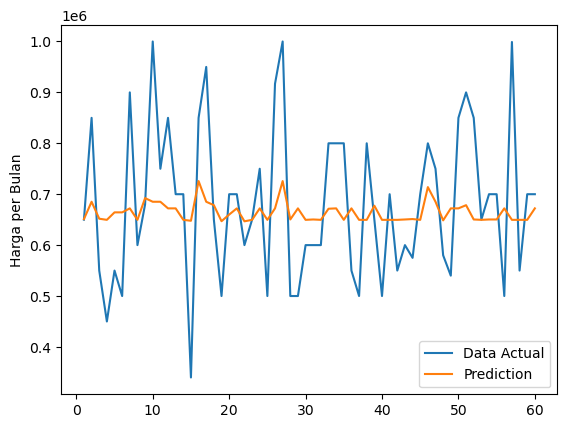

In [17]:
# visualisation model prediction & actual data.
import matplotlib.pyplot as plt
import seaborn as sns

# make prediction
y_pred = model.predict(X_test)

sns.lineplot(x=range(1,len(X_test)+1), y=y_test, label='Data Actual')
sns.lineplot(x=range(1,len(X_test)+1), y=y_pred, label='Prediction')
plt.legend()
plt.show()

# Improvement Model

#### Improve the model by trying different feature range tuning in each colum

#### Improvement model dengan mencoba tuning feature range berbeda di setiap kolomnya

In [18]:
# check n cols after df transformation
df_pipeline.transform(X_train).columns

Index(['Ratings', 'Jumlah Fasilitas', 'Wifi', 'Kasur', 'Akses 24 Jam',
       'K. Mandi Dalam', 'Kloset Duduk', 'AC'],
      dtype='object')

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV

# make column transformer for scaler
scaler_each_colum = ColumnTransformer([
    ('scl_ratings', MinMaxScaler(), ['Ratings']),
    ('scl_cf', MinMaxScaler(), ['Jumlah Fasilitas']),
    ('scl_f', MinMaxScaler(), ['Wifi', 'Kasur', 'Akses 24 Jam', 
                               'K. Mandi Dalam', 'Kloset Duduk', 'AC'])
])

# pipeline model
pipeline2 = Pipeline([
    ('df_pipeline', df_pipeline),
    ('scaler', scaler_each_colum),
    ('algo', SVR())
])

In [20]:
# params
params = {
    'scaler__scl_ratings__feature_range' : [(0,1),(0,2),(0,3),(0,5)],
    'scaler__scl_cf__feature_range' : [(0,1),(0,2),(0,3),(0,5)],
    'scaler__scl_f__feature_range' : [(0,1),(0,2),(0,3),(0,5)], 
    'algo__kernel': ['linear', 'rbf', 'poly'],
    'algo__C': [0.1, 1, 10, 100],
    'algo__gamma': ['scale', 'auto'],
    'algo__epsilon': [0.1, 0.2, 0.5]
}

from sklearn.model_selection import RandomizedSearchCV
model2 = RandomizedSearchCV(pipeline2, param_distributions=params, scoring='neg_mean_squared_error', n_iter=50, n_jobs=-1, verbose=1)
model2.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('df_pipeline',
                                              Pipeline(steps=[('GCF',
                                                               FunctionTransformer(func=<function get_count_facilities at 0x0000022E5016B380>)),
                                                              ('GF',
                                                               FunctionTransformer(func=<function get_facilities at 0x0000022E5016BE20>)),
                                                              ('BR',
                                                               FunctionTransformer(func=<function bining_ratings at 0x0000022E50198540>))])),
                                             ('scaler',
                                              ColumnTransformer(tr...
                   param_distributions={'algo__C': [0.1, 1, 10, 100],
                                        'algo__epsilon': [0.1, 0.2, 0.5],
                                        'algo__gamma': ['scale', 'auto'],
                                        'algo__kernel': ['linear', 'rbf',
                                                         'poly'],
                                        'scaler__scl_cf__feature_range': [(0,
                                                                           1),
                                                                          (0,
                                                                           2),
                                                                          (0,
                                                                           3),
                                                                          (0,
                                                                           5)],
                                        'scaler__scl_f__feature_range': [(0, 1),
                                                                         (0, 2),
                                                                         (0, 3),
                                                                         (0,
                                                                          5)],
                                        'scaler__scl_ratings__feature_range': [(0,
                                                                                1),
                                                                               (0,
                                                                                2),
                                                                               (0,
                                                                                3),
                                                                               (0,
                                                                                5)]},
                   scoring='neg_mean_squared_error', verbose=1)

In [21]:
model2.best_params_

{'scaler__scl_ratings__feature_range': (0, 5),
 'scaler__scl_f__feature_range': (0, 3),
 'scaler__scl_cf__feature_range': (0, 5),
 'algo__kernel': 'poly',
 'algo__gamma': 'auto',
 'algo__epsilon': 0.2,
 'algo__C': 100}

# Evaluasi Model part 2

In [22]:
# evaluate data
print(f'best param : {model2.best_params_}')
print(f'Validation : {model2.score(X_train, y_train)}')
print(f'Testing : {model2.score(X_test, y_test)}')

best param : {'scaler__scl_ratings__feature_range': (0, 5), 'scaler__scl_f__feature_range': (0, 3), 'scaler__scl_cf__feature_range': (0, 5), 'algo__kernel': 'poly', 'algo__gamma': 'auto', 'algo__epsilon': 0.2, 'algo__C': 100}
Validation : -17761472181.282917
Testing : -18657642550.69443


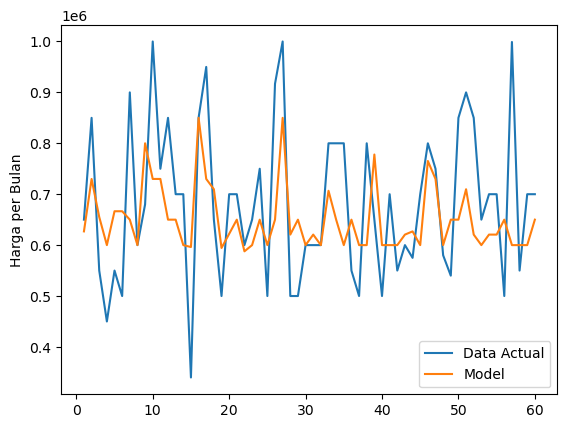

In [23]:
# visualisation model prediction & actual data.
import matplotlib.pyplot as plt
import seaborn as sns

# make prediction
y_pred = model2.predict(X_test)

sns.lineplot(x=range(1,len(X_test)+1), y=y_test, label='Data Actual')
sns.lineplot(x=range(1,len(X_test)+1), y=y_pred, label='Model')
plt.legend()
plt.show()

# Improvement Model part 2

#### Change the bolean value in each facility column, based on the order of the average cost price for the facility and the results are added (SUM) and divided by the number of facilities (Facility Sum) to make a new column (Value).

#### Mengubah nilai bolean pada setiap kolom fasilitas, berdasarkat urutan harga rata rata kos berdasarkar fasilitas tersebut dan hasilnya ditambahkan (SUM) dan di bagi banyak fasilitas (Jumlah Fasilitas) untuk dijadikan kolom baru (Value).

In [24]:
# function to handle the task above
def get_value_facilities(DATA):
    
    # unique values
    unique_facility = ['WiFi', 'Kasur', 'Akses 24 Jam', 'K. Mandi Dalam', 'Kloset Duduk', 'AC']
    
    # list for value_facilities
    value_of_facilities = []

    D = DATA.copy(deep=True) # copy dataframe
    
    # looping for index in colum of dataframe
    for d in D['Fasilitas']:
        L = d.split(', ') # split value
        
        value = 0 # value each data
        
        # filter and get value 
        for uf,v in zip(unique_facility, [3,2,1,5,4,6]):
            if uf in L:
                value += v
            else:
                continue
                
        value_of_facilities.append(value)
        
    
    D.drop('Fasilitas', axis=1, inplace=True) # drop original colum
    
    new_df = pd.DataFrame({
        'Jumlah Value' : value_of_facilities
    }, index=D.index)
    D = pd.concat([D, new_df], axis=1)
    D['Value'] = D['Jumlah Value'] / D['Jumlah Fasilitas']
    return D.drop('Jumlah Value', axis=1)

In [25]:
# pipeline model
df_pipeline3 = Pipeline([
    ('GCF',FunctionTransformer(get_count_facilities)),
    ('GF',FunctionTransformer(get_value_facilities)),
    ('BR',FunctionTransformer(bining_ratings))
])

scaler_each_colum3 = ColumnTransformer([
    ('scl_ratings', MinMaxScaler(), ['Ratings']),
    ('scl_cf', MinMaxScaler(), ['Jumlah Fasilitas']),
    ('scl_vf', MinMaxScaler(), ['Value'])
])

pipeline3 = Pipeline([
    ('df_pipeline', df_pipeline3),
    ('scaler', scaler_each_colum3),
    ('algo', SVR())
])

In [26]:
df_pipeline3.fit_transform(X_train.head())

,Ratings,Jumlah Fasilitas,Value
95,1.0,3.0,2.0
126,1.0,3.0,2.0
120,1.0,3.0,2.0
67,1.0,2.0,2.0
101,1.0,2.0,1.5


In [27]:
X_train.head()

,Fasilitas,Ratings
95,"WiFi, Kasur, Akses 24 Jam",NaN
126,"WiFi, Kasur, Akses 24 Jam",NaN
120,"WiFi, Kasur, Akses 24 Jam",NaN
67,"WiFi, Akses 24 Jam",NaN
101,"Kasur, Akses 24 Jam",NaN


In [28]:
#
params = {
    'scaler__scl_ratings__feature_range' : [(0,1),(0,2),(0,3),(0,5)],
    'scaler__scl_cf__feature_range' : [(0,1),(0,2),(0,3),(0,5)],
    'scaler__scl_vf__feature_range' : [(0,1),(0,2),(0,3),(0,5)], 
    'algo__kernel': ['linear', 'rbf', 'poly'],
    'algo__C': [0.1, 1, 10, 100],
    'algo__gamma': ['scale', 'auto'],
    'algo__epsilon': [0.1, 0.2, 0.5]
}

# tuning
from sklearn.model_selection import RandomizedSearchCV
model3 = RandomizedSearchCV(pipeline3, param_distributions=params, scoring='neg_mean_squared_error', n_iter=50, n_jobs=-1, verbose=1)
model3.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('df_pipeline',
                                              Pipeline(steps=[('GCF',
                                                               FunctionTransformer(func=<function get_count_facilities at 0x0000022E5016B380>)),
                                                              ('GF',
                                                               FunctionTransformer(func=<function get_value_facilities at 0x0000022E52CEDEE0>)),
                                                              ('BR',
                                                               FunctionTransformer(func=<function bining_ratings at 0x0000022E50198540>))])),
                                             ('scaler',
                                              ColumnTransfor...
                   param_distributions={'algo__C': [0.1, 1, 10, 100],
                                        'algo__epsilon': [0.1, 0.2, 0.5],
                                        'algo__gamma': ['scale', 'auto'],
                                        'algo__kernel': ['linear', 'rbf',
                                                         'poly'],
                                        'scaler__scl_cf__feature_range': [(0,
                                                                           1),
                                                                          (0,
                                                                           2),
                                                                          (0,
                                                                           3),
                                                                          (0,
                                                                           5)],
                                        'scaler__scl_ratings__feature_range': [(0,
                                                                                1),
                                                                               (0,
                                                                                2),
                                                                               (0,
                                                                                3),
                                                                               (0,
                                                                                5)],
                                        'scaler__scl_vf__feature_range': [(0,
                                                                           1),
                                                                          (0,
                                                                           2),
                                                                          (0,
                                                                           3),
                                                                          (0,
                                                                           5)]},
                   scoring='neg_mean_squared_error', verbose=1)

# Evaluasi Model part 3

In [29]:
# evaluate data
print(f'best param : {model3.best_params_}')
print(f'Validation : {model3.score(X_train, y_train)}')
print(f'Testing : {model3.score(X_test, y_test)}')

best param : {'scaler__scl_vf__feature_range': (0, 3), 'scaler__scl_ratings__feature_range': (0, 2), 'scaler__scl_cf__feature_range': (0, 2), 'algo__kernel': 'poly', 'algo__gamma': 'scale', 'algo__epsilon': 0.5, 'algo__C': 100}
Validation : -16348122515.689962
Testing : -20778200351.375927


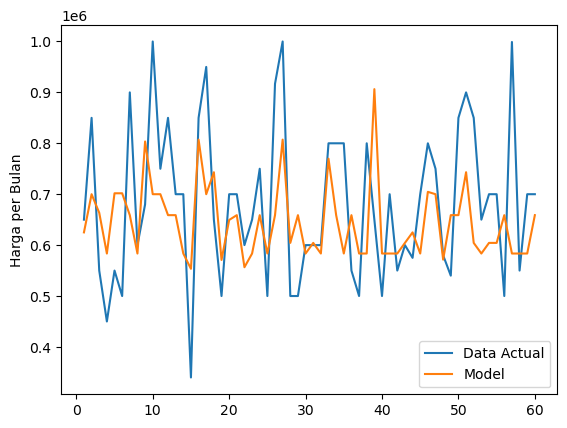

In [30]:
# visualisation model prediction & actual data.
import matplotlib.pyplot as plt
import seaborn as sns

# make prediction
y_pred = model3.predict(X_test)

sns.lineplot(x=range(1,len(X_test)+1), y=y_test, label='Data Actual')
sns.lineplot(x=range(1,len(X_test)+1), y=y_pred, label='Model')
plt.legend()
plt.show()

# Conclusion 
#### Here you can see that the best model (with the fewest errors) is in the model2 variable, so I decided to save that model as the final project. It should be noted that this model is not perfect, in fact, in my opinion, it is not good due to the lack of feature data and the data volume is still relatively small.
### Thank You

# Kesimpulan 
#### Disini terlihat bahwa model yang paling bagus (paling sedikit error) ada pada variabel model2, jadi saya memutuskan untuk menyimpan model tersebut sebagai final project. Harus diketahui bahwa model ini belum sempurna bahkan menurut saya kurang bagus dikarenakan kurangnya data fitur dan volume data yang masih relatif kecil.
### Terima kasih

In [31]:
import pickle
with open('model/svm_regression_v2.pkl','wb') as file:
    pickle.dump(model2, file)